# Comparing 2 riverine Ba forcing

This is the notebook that compares 2 different riverine Ba forcing. The second one (`GEOTRACE_NEW01_1m_20020101_20051231_ptrc_T.nc`) is better.

In [1]:
import sys
sys.path.insert(0, '_libs/')

In [2]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

In [11]:
RB=[0.25, 0.41, 0.88]    # Royal blue
AM=[0.90, 0.17, 0.31]    # Amathran
SB=[0.06, 0.05, 0.03]    # Smokey Black
AFB = [0.36, 0.54, 0.66] # Air Force Blue
AG = [0.55, 0.71, 0.0]   # Apple Green
AZ = [0.0, 0.5, 1.0]     # Azure
CB = [0.37, 0.62, 0.63]  # Cadet blue
SP = [1.0, 0.72, 0.77]   # Sakura
CamB = [0.64, 0.76, 0.68]# Cambridge blue
DC = [0.0, 0.55, 0.55]   # Dark cyan
DE = [0.08, 0.38, 0.74]  # Denim
BB = [0.54, 0.81, 0.94]  # Baby blue

In [3]:
FName1 = '/ocean/yingkai/GEOTRACES/Simulations/GEOTRACE01_1m_20020101_20051231_ptrc_T.nc'
FName2 = '/ocean/yingkai/GEOTRACES/Simulations/GEOTRACE_NEW01_1m_20020101_20051231_ptrc_T.nc'

In [4]:
ptrc_obj = nc.Dataset(FName1)
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]
deptht=ptrc_obj.variables['deptht'][:]

In [5]:
river_name = ['Pechora',"Ob' + Pur.", 'Yenisey', 'Olenek', 'Yana', 'Indigirka', 'Kolyma', 'Mackenzie', \
              'Sev. Dvina', 'Lena', 'Khatanga', 'Taimyra', 'Pyasina', 'Yukon']
lon_river = np.array([52, 78, 88, 123, 136, 148, 159, -135, 42, 133, 103, 100, 88, -167.3])
lat_river = np.array([67, 71, 70, 72, 71, 70, 69, 67.5, 65, 71, 72, 76, 73, 65])+3

strait = ['Bering Strait']
lon_strait = np.array([-169])
lat_strait = np.array([68])

In [6]:
x_river, y_river = Nts.nearest_search(nav_lon, nav_lat, lon_river, lat_river)
x_strait, y_strait = Nts.nearest_search(nav_lon, nav_lat, lon_strait, lat_strait)

In [7]:
ptrc_obj = nc.Dataset(FName1)
Ba1 = ptrc_obj.variables['Ba'][-1, :, :, :]
Ob_Ba1 = ptrc_obj.variables['Ba'][:, 0, x_river[1], y_river[1]]
MK_Ba1 = ptrc_obj.variables['Ba'][:, 0, x_river[7], y_river[7]]
KO_Ba1 = ptrc_obj.variables['Ba'][:, 0, x_river[6], y_river[6]]
LN_Ba1 = ptrc_obj.variables['Ba'][:, 0, x_river[9], y_river[9]]
#YK_Ba = ptrc_obj.variables['Ba'][:, 0, x_river[13], y_river[13]]
BeringS_Ba1 = ptrc_obj.variables['Ba'][:, 0, x_strait[0], y_strait[0]]

ptrc_obj = nc.Dataset(FName2)
Ba2 = ptrc_obj.variables['Ba'][-1, :, :, :]
Ob_Ba2 = ptrc_obj.variables['Ba'][:, 0, x_river[1], y_river[1]]
MK_Ba2 = ptrc_obj.variables['Ba'][:, 0, x_river[7], y_river[7]]
KO_Ba2 = ptrc_obj.variables['Ba'][:, 0, x_river[6], y_river[6]]
LN_Ba2 = ptrc_obj.variables['Ba'][:, 0, x_river[9], y_river[9]]
#YK_Ba = ptrc_obj.variables['Ba'][:, 0, x_river[13], y_river[13]]
BeringS_Ba2 = ptrc_obj.variables['Ba'][:, 0, x_strait[0], y_strait[0]]

In [8]:
L=0; lev1 = np.arange(30, 85, 5)

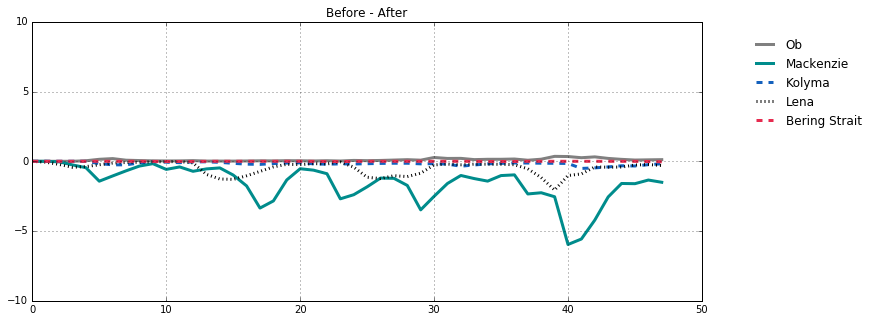

In [13]:
fig=plt.figure(figsize=(12, 5))
ax = fig.gca(); ax.grid()
ax.plot(Ob_Ba1-Ob_Ba2, 'k-', color='gray', lw=3, label='Ob')
ax.plot(MK_Ba1-MK_Ba2, 'k-', color=DC, lw=3, label='Mackenzie')
ax.plot(KO_Ba1-KO_Ba2, 'k--', color=DE, lw=3, label='Kolyma')
ax.plot(LN_Ba1-LN_Ba2, 'k:', lw=3, label='Lena')
ax.plot(BeringS_Ba1-BeringS_Ba2, 'k--', color=AM, lw=3, label='Bering Strait')
#ax.plot(YK_Ba, 'k-', color='r', lw=3, label='Yukon')
ax.set_ylim(-10, 10); #ax.set_xlim(0, )
LG=ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1); LG.draw_frame(False) 
ax.set_title('Before - After')

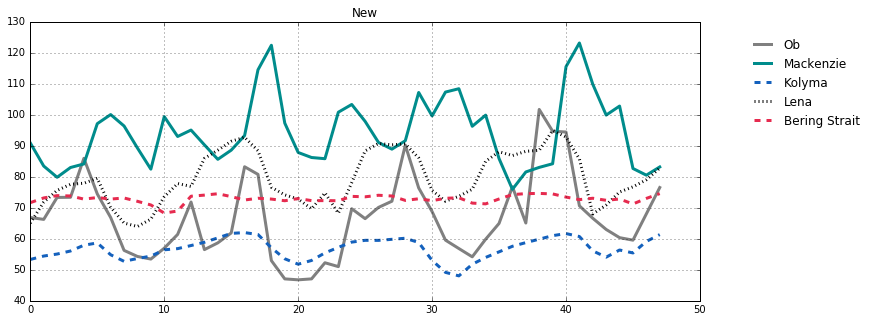

In [16]:
fig=plt.figure(figsize=(12, 5))
ax = fig.gca(); ax.grid()
ax.plot(Ob_Ba2, 'k-', color='gray', lw=3, label='Ob')
ax.plot(MK_Ba2, 'k-', color=DC, lw=3, label='Mackenzie')
ax.plot(KO_Ba2, 'k--', color=DE, lw=3, label='Kolyma')
ax.plot(LN_Ba2, 'k:', lw=3, label='Lena')
ax.plot(BeringS_Ba2, 'k--', color=AM, lw=3, label='Bering Strait')
#ax.plot(YK_Ba, 'k-', color='r', lw=3, label='Yukon')
ax.set_ylim(40, 130); #ax.set_xlim(0, )
LG=ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1); LG.draw_frame(False) 
ax.set_title('New')

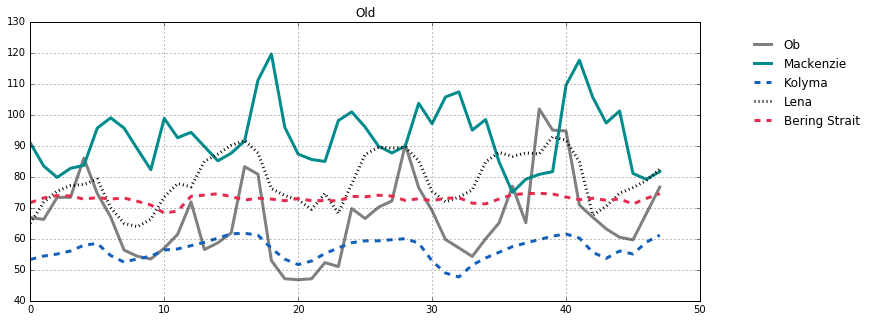

In [17]:
fig=plt.figure(figsize=(12, 5))
ax = fig.gca(); ax.grid()
ax.plot(Ob_Ba1, 'k-', color='gray', lw=3, label='Ob')
ax.plot(MK_Ba1, 'k-', color=DC, lw=3, label='Mackenzie')
ax.plot(KO_Ba1, 'k--', color=DE, lw=3, label='Kolyma')
ax.plot(LN_Ba1, 'k:', lw=3, label='Lena')
ax.plot(BeringS_Ba1, 'k--', color=AM, lw=3, label='Bering Strait')
#ax.plot(YK_Ba, 'k-', color='r', lw=3, label='Yukon')
ax.set_ylim(40, 130); #ax.set_xlim(0, )
LG=ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1); LG.draw_frame(False) 
ax.set_title('Old')